In [1]:
import json
from os import path
from collections import defaultdict

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from compounds_research import settings

In [2]:
GRAY_INTENSITY = 0.5
GRAY = (GRAY_INTENSITY, GRAY_INTENSITY, GRAY_INTENSITY, 1)

In [3]:
def load_data(currency):
    filepath = path.join(settings.DATA_PATH, "aave", f"{currency}-deposits.json")
    with open(filepath) as f:
        return json.load(f)

In [4]:
def make_df(items):
    df = pd.DataFrame(items)
    df["amount"] = pd.to_numeric(df["amount"])
    return df
    
def group_by_user(df):
    return df[["user", "amount"]].groupby(by="user").sum()

In [5]:
def plot_cumulative_hist(locked_funds):
    locked_funds = sorted(locked_funds)
    total = sum(locked_funds)
    cum_funds = [sum(locked_funds[:i]) for i in range(0, len(locked_funds) + 1)]
    heights = [v / total for v in cum_funds]
    x = np.arange(len(heights))
    ax = sns.barplot(x, heights, color=GRAY)
    plt.xticks(ax.get_xticks()[::20], ax.get_xticklabels()[::20], rotation=45)
    ax.set_yticklabels(["{0}%".format(int(v * 100)) for v in ax.get_yticks()])
    ax.set_ylabel("Cumulative percentage of locked funds")
    ax.set_xlabel("Number of accounts")
    plt.tight_layout(w_pad=0.5)
    return ax

In [6]:
def compute_stats(currency):
    print(f"stats for {currency}")
    data = load_data(currency)
    deposits = make_df(data["deposits"])
    redeems = make_df(data["redeems"])
    deposits_by_user = group_by_user(deposits)
    redeem_by_user = group_by_user(redeems)
    locked_by_user = (deposits_by_user - redeem_by_user).sort_values(by="amount", ascending=False).amount
    non_zero_user = locked_by_user[locked_by_user > 0]
    print("total users: ", len(locked_by_user))
    print("total non-zero: ", len(non_zero_user))
    return plot_cumulative_hist(non_zero_user)
    

stats for DAI
total users:  2441
total non-zero:  303


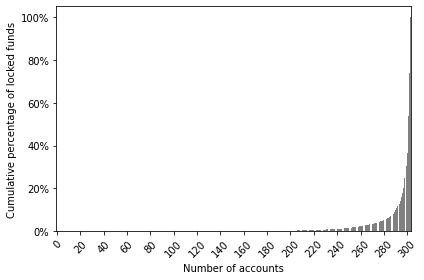

In [7]:
compute_stats("DAI")

stats for ETH
total users:  2326
total non-zero:  328


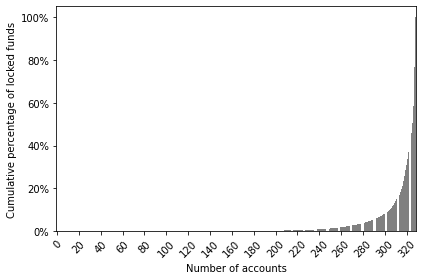

In [8]:
compute_stats("ETH")

stats for USDC
total users:  1210
total non-zero:  175


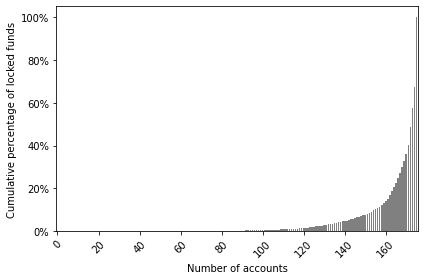

In [9]:
compute_stats("USDC")